# IQ linear regression analysis

The goal of this exercise is to assess whether the brain size and body size of an individual are predictive of the intelligence of the individual.

## 1. Packages and load data

In [17]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import statmodels for regression
import statsmodels.api as sm

# load data
df_iq = pd.read_csv('data/iqsize.txt', sep = '\t')
df_iq.head()

,PIQ,Brain,Height,Weight
0,124,81.69,64.5,118
1,150,103.84,73.3,143
2,128,96.54,68.8,172
3,134,95.15,65.0,147
4,110,92.88,69.0,146


In [18]:
# dataframe info
df_iq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PIQ     38 non-null     int64  
 1   Brain   38 non-null     float64
 2   Height  38 non-null     float64
 3   Weight  38 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 1.3 KB


## 2. Linear regression

Regressions setup:

- 38 individuals
- response variable (y): Performance IQ scores (PIQ)
- potential predictor (independent variable x1): brain size from MRI scans
- potential predictor (independent variable x2): height in inches
- potential predictor (independent variable x3): weight in pounds

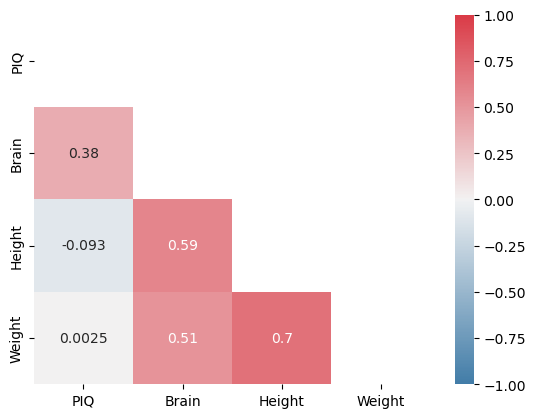

In [19]:
# correlation calculation
corr = df_iq.corr()

# only show one side
mask = np.triu(np.ones_like(corr, dtype=bool))

# palette selection
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# create heatmap
sns.heatmap(
    corr,
    mask = mask,
    vmin = -1,
    vmax = 1,
    cmap = cmap,
    annot = True
);

### 2.1 Regression plots

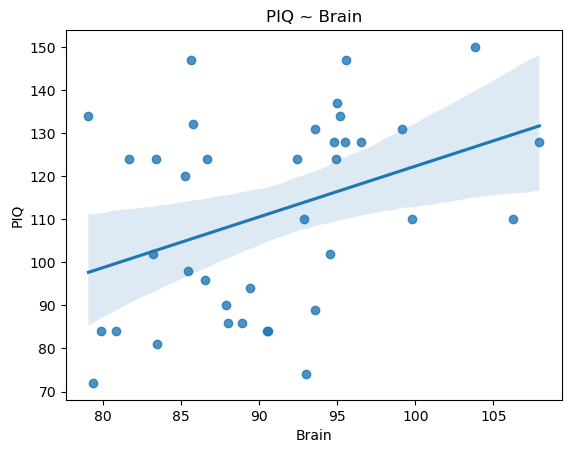

In [20]:
# PIQ ~ Brain
sns.regplot(data = df_iq, x = "Brain", y = "PIQ", lowess=False).set(title='PIQ ~ Brain');

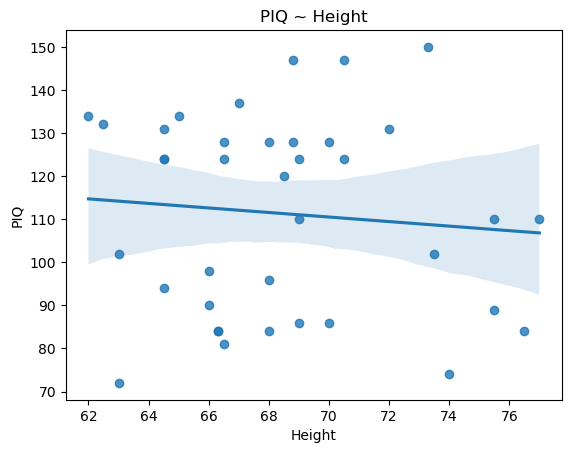

In [21]:
# PIQ ~ Height
sns.regplot(data = df_iq, x = "Height", y = "PIQ", lowess=False).set(title='PIQ ~ Height'); 

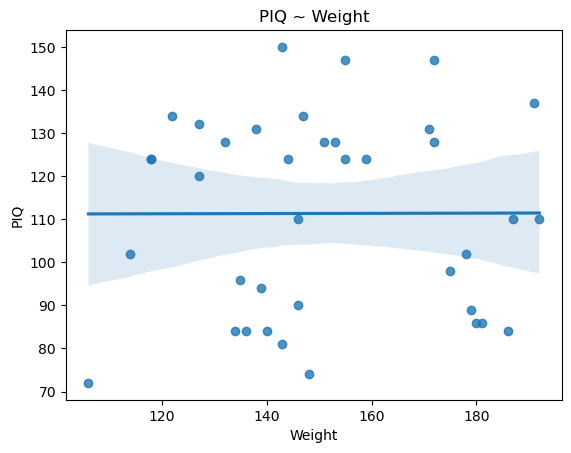

In [22]:
# PIQ ~ Weight
sns.regplot(data = df_iq, x = "Weight", y = "PIQ", lowess=False).set(title='PIQ ~ Weight'); 

### 2.2 Boxplots

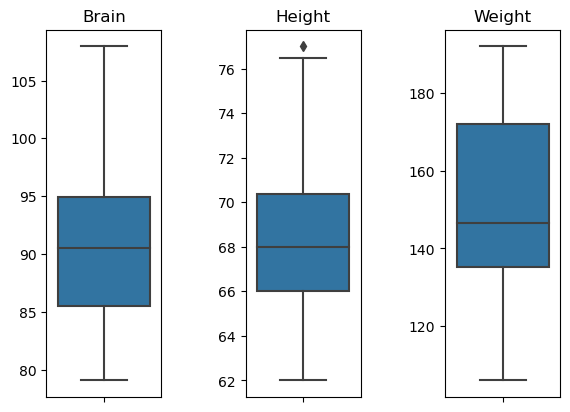

In [23]:
# subplots 3 columns
fig, axes = plt.subplots(ncols=3);
# padding
fig.tight_layout(pad = 3)

# boxplots
sns.boxplot(y='Brain', data=df_iq, ax=axes[0]).set(title = "Brain", ylabel = None)
sns.boxplot(y='Height', data=df_iq, ax=axes[1]).set(title = "Height", ylabel = None)
sns.boxplot(y='Weight', data=df_iq, ax=axes[2]).set(title = "Weight", ylabel = None);

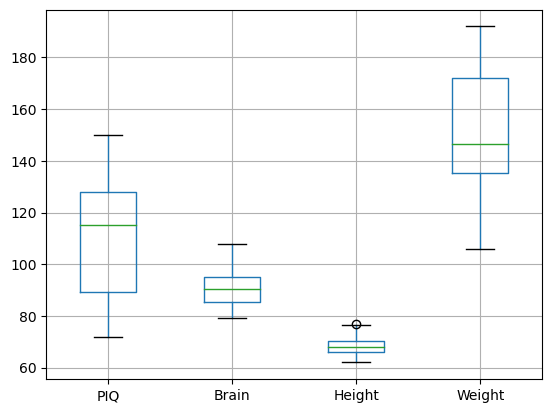

In [24]:
# dependent and independent variables boxplot
df_iq.boxplot();

### 2.3 Simple linear regressions one by one

**PIQ ~ Brain**

In [25]:
# response variable
y = df_iq['PIQ']

# potential predictor
X = sm.add_constant(df_iq['Brain'])

# fit linear regression
linear_1 = sm.OLS(y, X).fit()

# print output
print('Coefficients', linear_1.params, sep='\n')

Coefficients
const    4.651904
Brain    1.176612
dtype: float64


In [26]:
# linear regression summary from statsmodels
linear_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     5.994
Date:                Thu, 11 May 2023   Prob (F-statistic):             0.0194
Time:                        09:34:56   Log-Likelihood:                -168.97
No. Observations:                  38   AIC:                             341.9
Df Residuals:                      36   BIC:                             345.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6519     43.712      0.106      0.916     -84.000      93.304
Brain          1.1766      0.481      2.448      0.019       0.202       2.151
==============================================================================
Omnibus:                        5.134   Durbin-Watson:                   1.459
Prob(Omnibus):                  0.077   Jarque-Bera (JB):                1.931
Skew:                           0.088   Prob(JB):                        0.381
Kurtosis:                       1.910   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**PIQ ~ Height**

In [27]:
# response variable
y = df_iq['PIQ']

# potential predictor
X = sm.add_constant(df_iq['Height'])

# fit linear regression
linear_2 = sm.OLS(y, X).fit()

# print output
print('Coefficients', linear_2.params, sep='\n')

Coefficients
const     147.406689
Height     -0.527098
dtype: float64


In [28]:
# linear regression summary from statsmodels
linear_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.019
Method:                 Least Squares   F-statistic:                    0.3151
Date:                Thu, 11 May 2023   Prob (F-statistic):              0.578
Time:                        09:34:56   Log-Likelihood:                -171.73
No. Observations:                  38   AIC:                             347.5
Df Residuals:                      36   BIC:                             350.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        147.4067     64.350      2.291      0.028      16.899     277.914
Height        -0.5271      0.939     -0.561      0.578      -2.431       1.377
==============================================================================
Omnibus:                        6.631   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                2.189
Skew:                          -0.107   Prob(JB):                        0.335
Kurtosis:                       1.844   Cond. No.                     1.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**PIQ ~ Weight**

In [29]:
# response variable
y = df_iq['PIQ']

# potential predictor
X = sm.add_constant(df_iq['Weight'])

# fit linear regression
linear_3 = sm.OLS(y, X).fit()

# print output
print('Coefficients', linear_3.params, sep='\n')

Coefficients
const     110.976871
Weight      0.002418
dtype: float64


In [30]:
# linear regression summary from statsmodels
linear_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.028
Method:                 Least Squares   F-statistic:                 0.0002272
Date:                Thu, 11 May 2023   Prob (F-statistic):              0.988
Time:                        09:34:56   Log-Likelihood:                -171.89
No. Observations:                  38   AIC:                             347.8
Df Residuals:                      36   BIC:                             351.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.9769     24.514      4.527      0.000      61.259     160.694
Weight         0.0024      0.160      0.015      0.988      -0.323       0.328
==============================================================================
Omnibus:                       10.305   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                2.646
Skew:                          -0.111   Prob(JB):                        0.266
Kurtosis:                       1.727   Cond. No.                     1.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# brain R-squared: 0.143 (and t-test significant)
# height R-squared: 0.009 (and t-test not significant)
# weight R-squared: 0 (and t-test not significant)

### 2.4 Conclusion

In [32]:
# the best predictor (among the 3) is 'Brain'

# model equation
# IQ = 4.652 + 1.177*df_iq['Brain']

# final interpretation
# the IQ intercept is 4.652
# when the brain is 0, the predicted value for IQ is 4.652
# for every unit increase in brain size, the predicted valule of IQ increases by 1.177